# Manual Neural Network

In [1]:
class SimpleClass():
    
    def __init__(self):
        print("Hello")

In [2]:
X = SimpleClass #If you dont add Paranthesis .It will not call __init__() method 
X

__main__.SimpleClass

In [3]:
X = SimpleClass()#These will call __init__().Because init() is called on creation of instance of Class
X

Hello


In [4]:
class SimpleClass():
    
    def __init__(self):
        print("Hello")
    
    def yell(self):
        print("Yelling")

In [5]:
X = SimpleClass()

Hello


In [6]:
X.yell()

Yelling


### Inheritance

In [7]:
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        print("Extend")

In [8]:
# __init() of Extended class will be called and not of SimpleClass - Method Overriding
y = ExtendedClass()

Extend


### use of super()

In [9]:
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        
        super().__init__() #These will class __init() of super or parent class
        print("Extend")

In [10]:
y = ExtendedClass()

Hello
Extend


### use of parameterized init()

In [13]:
class SimpleClass():
    
    def __init__(self,name):
        print("Hello " + name)
    
    def yell(self):
        print("Yelling")
        
class ExtendedClass(SimpleClass):
    
    def __init__(self):
        
        super().__init__("Lucky") #These will class __init() of super or parent class
        print("Extend")

In [14]:
y = ExtendedClass()

Hello Lucky
Extend


### Manual Neural Network - Part 2 : Operations

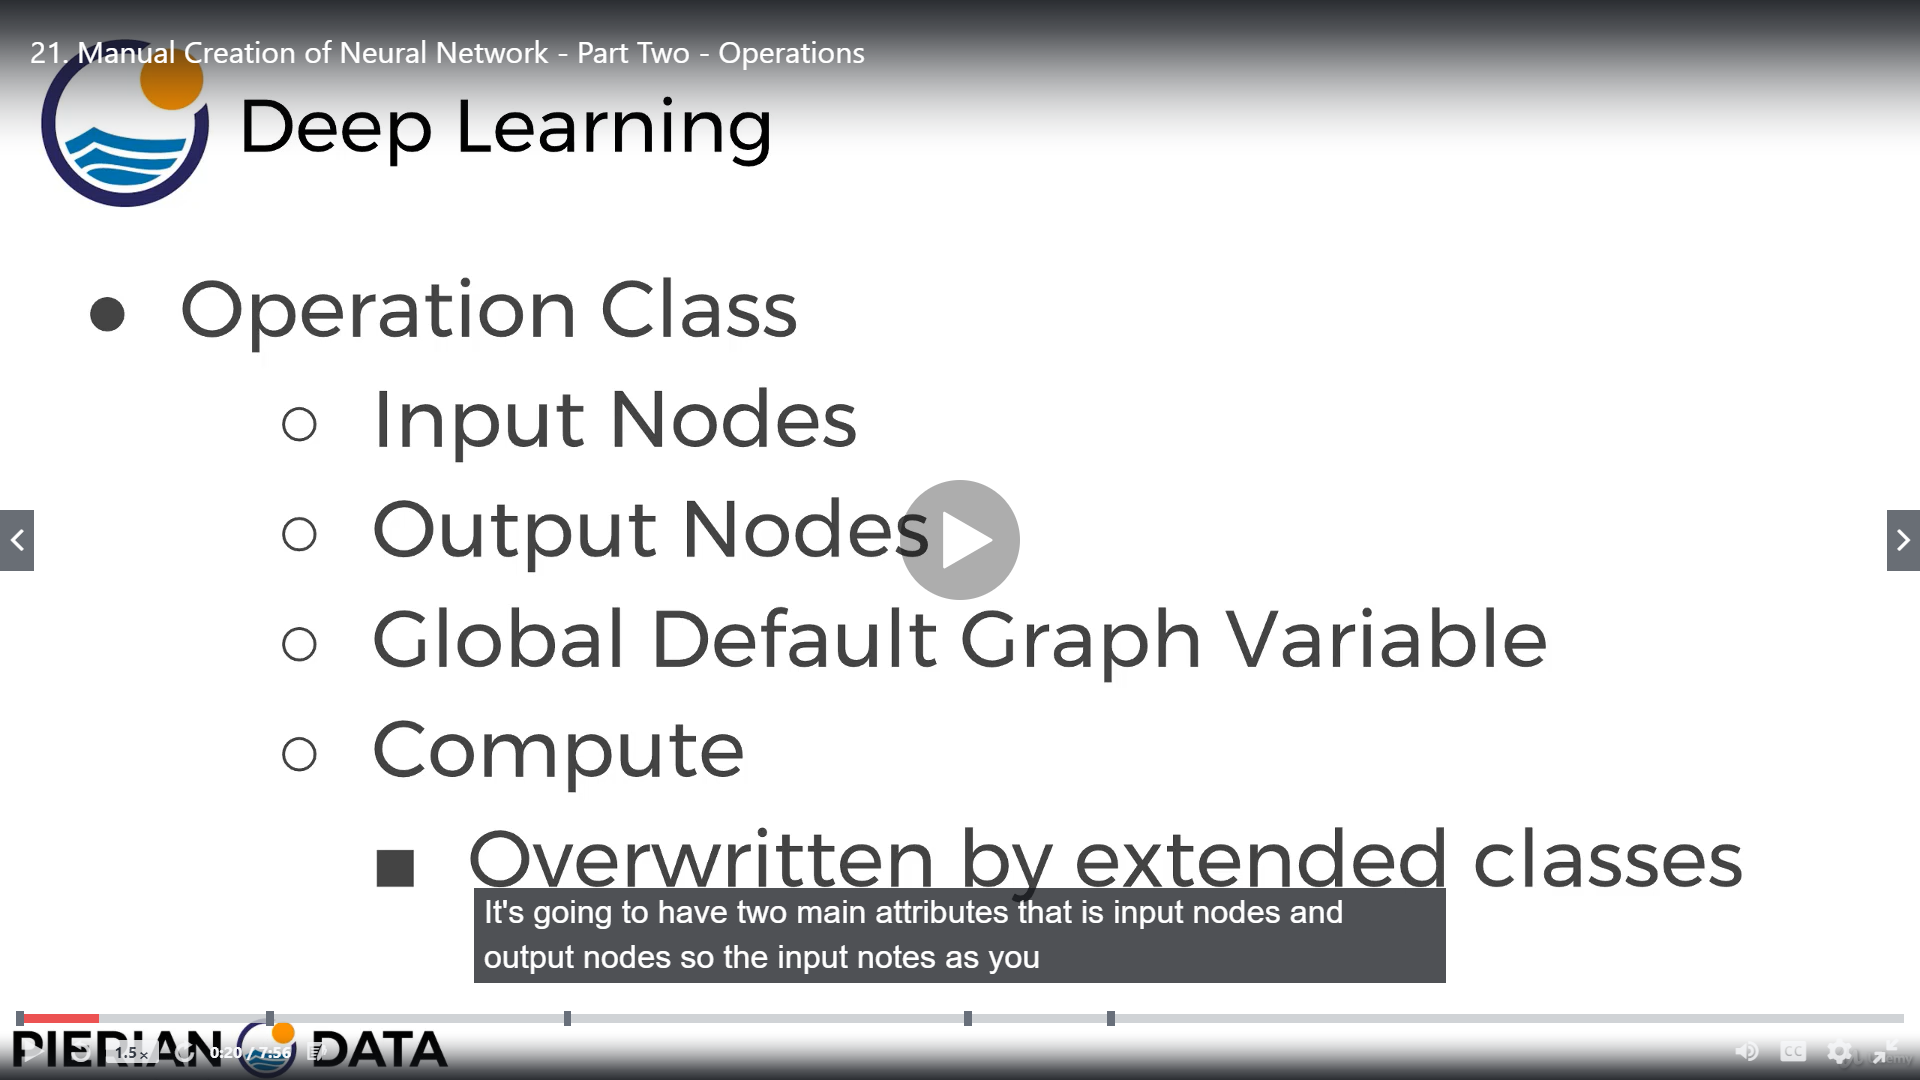

We have two Constants n1 and n2 and Operation n3 . We will have skeleton operation class and this operation class is going to be inherited by another class

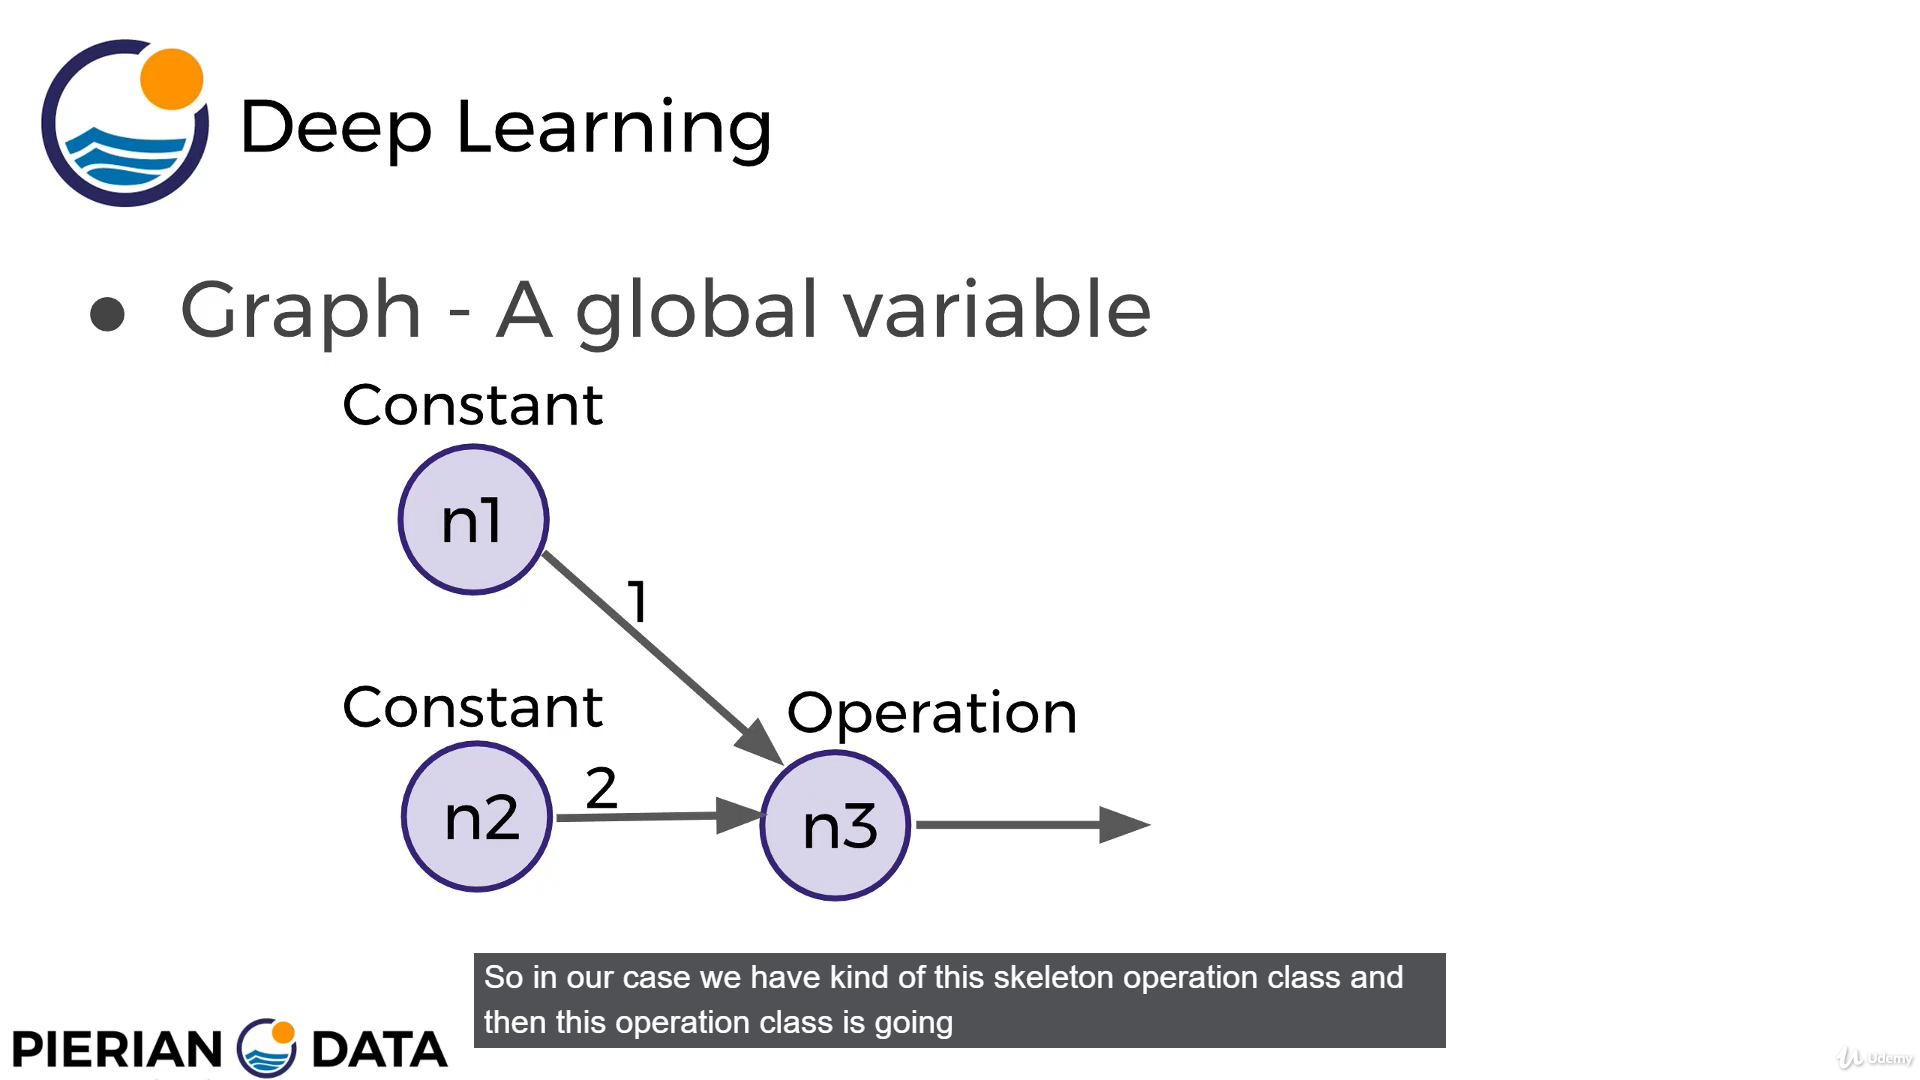

So For Example we can have a Add class that inherits Operation class . It takes two inputs 1 and 2 and outputs 3

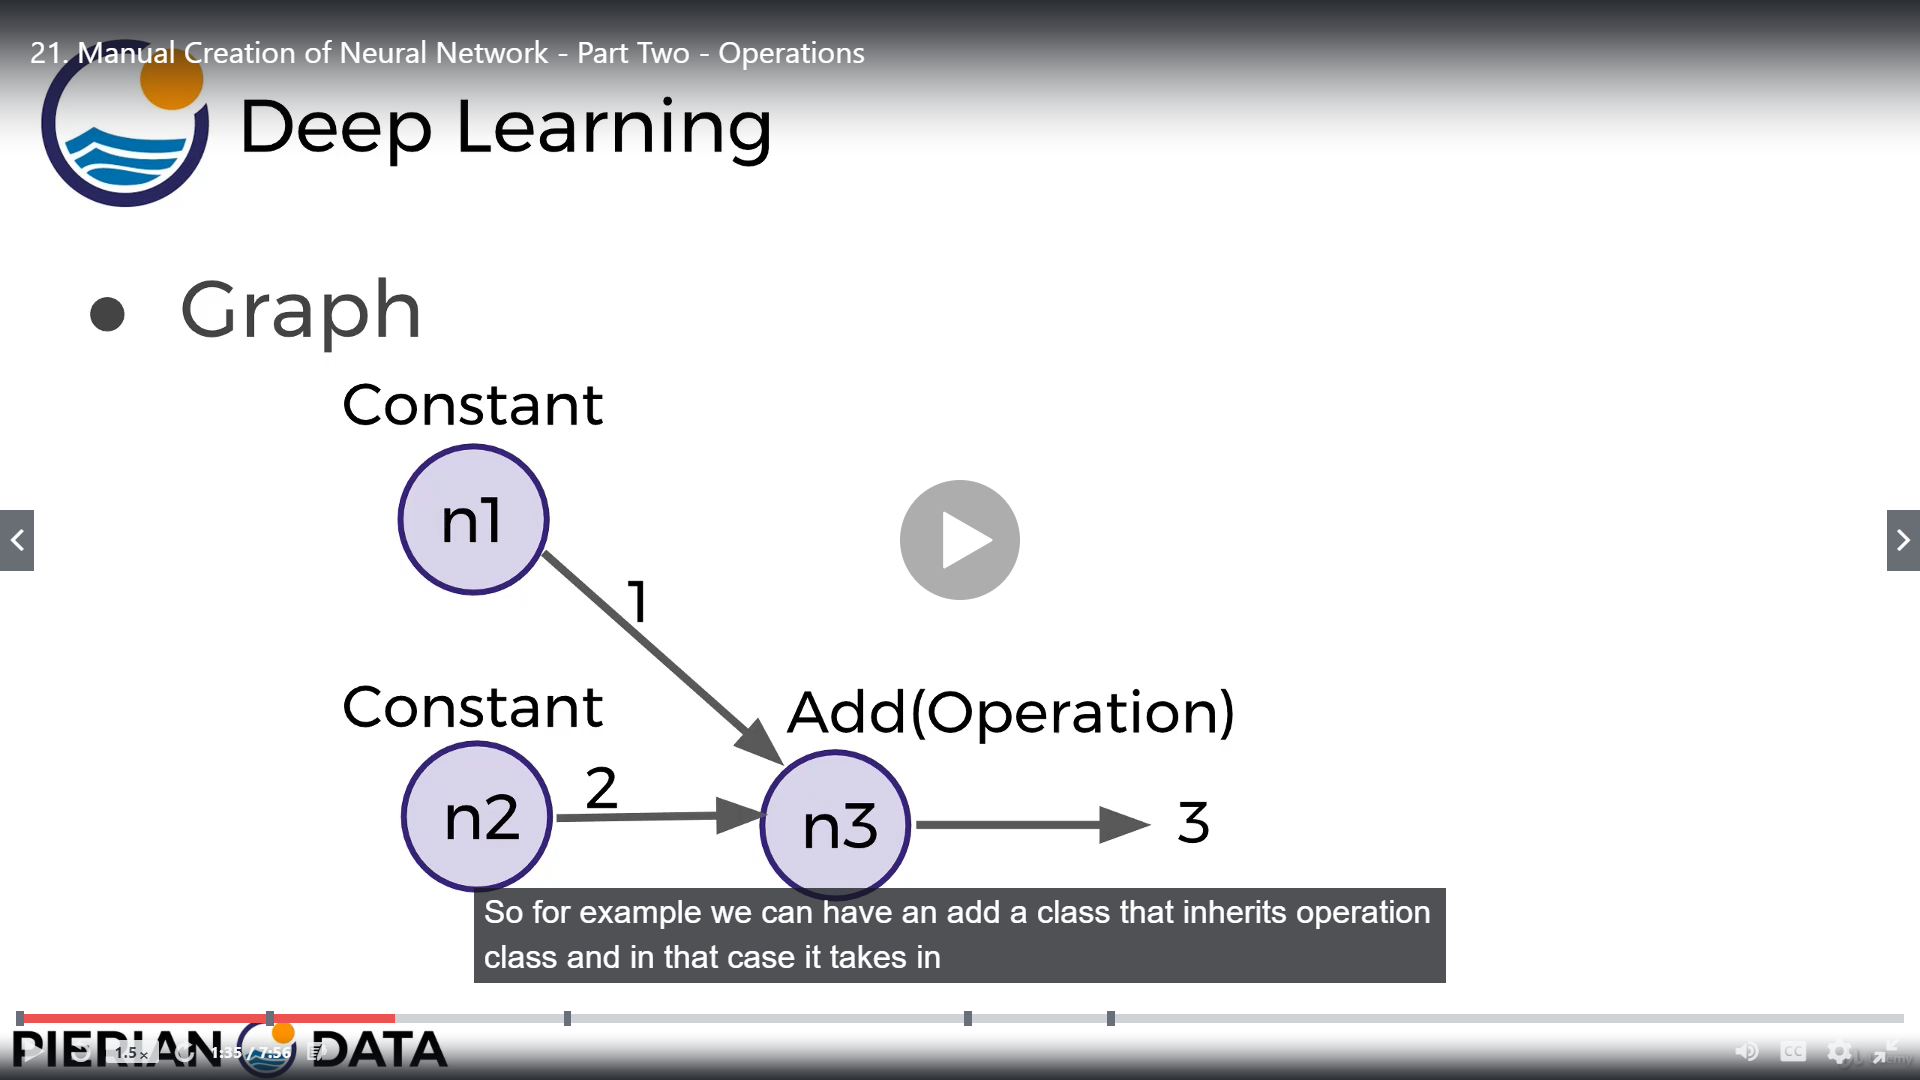

### Operation class

In [80]:
class Operation():
    
    def __init__(self,input_nodes=[]):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        #For Every node in input we are going to append this particular operation
        #i-e For every node in input nodes that are going into operation.We will append these operation to output nodes 
        for node in input_nodes:
            node.output_nodes.append(self)  #self is reference to current Operation
            
        _default_graph.operations.append(self)
    
    #Placeholder method which will be overwritten by actual specific operation that inherits from Operation class
    def compute(self):
        pass
        

In [81]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
    
    #Compute will perform actual computation
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

In [82]:
class multiply(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
    
    #Compute will perform actual computation
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var * y_var

In [83]:
class matmul(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
    
    #Compute will perform actual computation
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var)

### Manual neural network Part 3 : Placeholders and Variables and Graphs

Placeholders - An "Empty Node" that needs a value to be provided to compute Output - Can be for Featurs/Labels .It is placeholder because intially you will not have data.Its going to come from your data source \
Variables - Changeable Parameter of Graph - Can be weights of neural network \
Graph - Gloabal variable connecting varaibles and placeholder to operations

In [84]:
class Placeholder():
    
    def __init__(self):
        
        #Initialize with output nodes
        self.output_nodes = []
        
        #Now we will grab global variable from default_graph 
        #So these graph object is going to have a bunch of placeholders 
        #Now we will append our placeholder to it 
        _default_graph.placeholders.append(self)

In [85]:
class Variable():
    
    def __init__(self,initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        #Default graph object contains some varaibles as well
        #Now we will append our variable to it
        _default_graph.variables.append(self)

In [86]:
#Global variable connecting varaible and placeholder to operation

class Graph():
    
    #These Graph contains a list of all varaibles inside the graph
    def __init__(self):
        
        # It will connect placeholders and variables to the operations it belongs to
        #List of Operations in Graph
        self.operations = []
        #List of Placeholder in Graph
        self.placeholders = []
        #List of Variables in graph
        self.variables = []
        
    #To make sure that if we have multiple instances of graphs we are connected to right one
    def set_as_default(self):
        
        #These will set _default_graph as global varaible
        global _default_graph  #Now we will also add it in Operation Class
        _default_graph = self
        
# We have a graph object that contains placeholder,Variables,Operation(Mul,Add..)

#### We will these below example

z = Ax + b

A=10
b=1

z = 10x + 1

Here x becomes a placeholder 

In [87]:
g = Graph()

In [88]:
# Now we will set these 'g' graph as default graph
g.set_as_default()

In [89]:
#Now we will create 2 variables - A,b
A = Variable(10)

In [90]:
b = Variable(1)

In [91]:
#We dont know the value initially
x = Placeholder()

In [92]:
# Now we have 2 operations - Multiplication and then Addition
y = multiply(A,x)
y

In [93]:
z = add(y,b)

In [94]:
z

Now we will do Post order traversal of nodes - See Computation in correct order. \
That is we need to make sure that Multiplication is done First and then Addition \
After PostOrder Traversal function we create a session that will actually execute these graph

#### Manual Neural Network  Part 4 - Session 

In [95]:
import numpy as np

def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [96]:
class Session():
    
    def run(self,operation,feed_dict={}):
        
        #Operation - Operation to compute 
        #Feed dict - Dictionary mapping placeholder to input values
        
        #Right now in graph we dont have any value for placeholders.So we will use feed_dict to provide value to placeholder
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder:
                #Then node ouput to be equal to dictionary
                #If it is placeholder we will give feed_dict value 
                node.output = feed_dict[node]
            
            elif type(node) == Variable:
                node.output = node.value
                
            else :
                # Operation 
                #Inputs will be Ouput of that input node for every input node
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs) #We dont know how many inputs we have in opertaion - * - args
                
            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [97]:
sess = Session()

In [98]:
result = sess.run(operation=z,feed_dict={x:10})

In [99]:
result

101

In [100]:
# now we will try another example

g = Graph()
g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2])

x = Placeholder()

y = matmul(A,x)
z = add(y,b)

In [101]:
sess = Session()
sess.run(operation = z ,feed_dict={x:10})

array([[101, 202],
       [301, 402]])

## Manual Neural network Classification Task

### Activation Function

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1/(1+np.exp(-z))

In [103]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

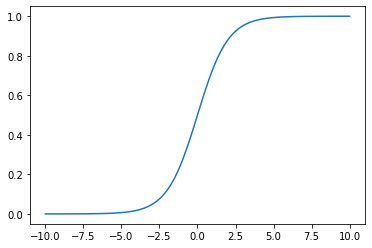

In [104]:
plt.plot(sample_z,sample_a)

In [122]:
#Now we will make Activation Function as Operation
class Sigmoid(Operation):
    
    def __init__(self,z):
        super().__init__([z])
    
    def compute(self,z_val):
        return 1/(1+np.exp(-z_val))       

In [108]:
from sklearn.datasets import make_blobs

In [109]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [110]:
type(data)

tuple

In [111]:
data[1] #Clasess they belong to

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1])

In [112]:
features = data[0]
labels = data[1]

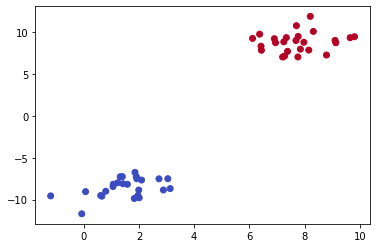

In [115]:
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')

Now we will use Neural Network to seperate these classes

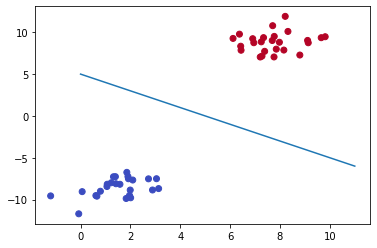

In [116]:
#Now we will these Line looks pretty good for seperating 2 classes
x= np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

Now we will define Perceptron model using matrix representation of features

## Defining the Perceptron

$$ y = mx + b $$

$$ y = -x + 5 $$

$$ f1 = mf2 + b , m=1$$

$$ f1 = -f2 + 5 $$

$$ f1 + f2 - 5 = 0 $$


### Convert to a Matrix Representation of Features

$$ w^Tx + b = 0 $$

$$   \Big(1, 1\Big)f - 5 = 0 $$

Then if the result is > 0 its label 1, if it is less than 0, it is label=0


### Example Point

Let's say we have the point f1=2 , f2=2 otherwise stated as (8,10). Then we have:

$$ 
\begin{pmatrix} 
1 , 1
\end{pmatrix} 
\begin{pmatrix} 
8 \\
10
\end{pmatrix} + 5 =  $$

### Now we will check with example

In [117]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5 #It Give positive value - Label 1 -Red

array([13])

In [118]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5 #It gives Negative value - Label 0-Blue

array([-13])

## Now we will make use of Session Graph

In [124]:
g = Graph()
g.set_as_default()

x = Placeholder()
w = Variable([1,1])
b = Variable(-5)
z = add(matmul(w,x),b)

In [125]:
a = Sigmoid(z)

In [126]:
sess =Session()

In [127]:
sess.run(operation =a,feed_dict={x:[8,10]})

0.999997739675702

In [128]:
sess.run(operation =a,feed_dict={x:[2,-10]})

2.2603242979035746e-06